<a href="https://colab.research.google.com/github/kamilkoralewski/data-science-bootcamp/blob/main/Facebook_Prophet_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
#import libraries
import itertools
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [ ]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv")
data.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [ ]:
#select variables
dataset = data.loc[:, ["dteday", "cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)                       

,dteday,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


#Data Transformation

In [ ]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [ ]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

#Visualization

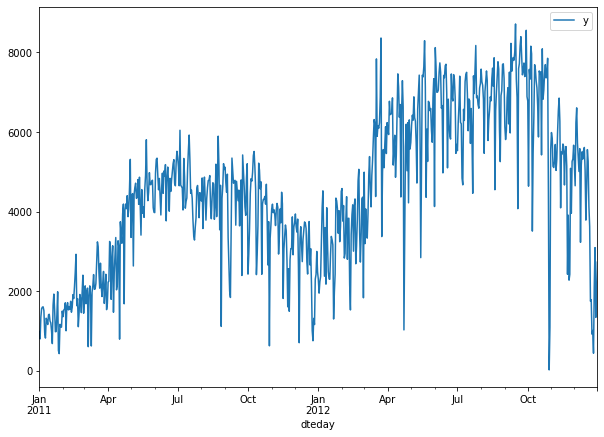

In [ ]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

# Traing and Test Set

In [ ]:
#Traing and test set
test_days = 31
traning_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


# Model Prognostyczny

In [ ]:
# Biblioteka


In [ ]:
# Model prognostyczny


In [ ]:
# Prognoza
predictions_X = model.forecast(steps = len(test_set)).rename("X")
predictions_X.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2012-12-01    4703.434234
2012-12-02    4152.109049
2012-12-03    4376.195688
2012-12-04    4211.156937
2012-12-05    4896.528749
Freq: D, Name: HW, dtype: float64

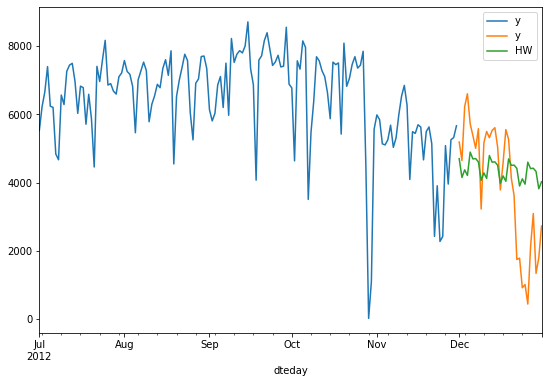

In [ ]:
# Wizualizacja
traning_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_X.plot(legend = True)


# Sprawdzenie modelu

In [ ]:
# MAE i RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_X),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_X)),0))

1390.0
1713.0


In [ ]:
# MAPE
def MAPE(y_true, y_pred):
  y_true, y_pret = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_X)


88.14082811284679

# Export prognozy

In [ ]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/Prognozy

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/Prognozy


In [ ]:
predictions_X.to_csv('predictions_X.csv', index = True)